# Qiskit codes for Fig. 2, 3, and 4.

In [1]:
import qiskit.tools.jupyter

%qiskit_version_table

In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram

from circuit_func import *
from utils import *


In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider(YOUR_PROVIDER)


# Four qubits

In [4]:
n=4

# solutions : [Most Significant <-> Least Singnificant]
solutions = [1,0,1,1]
sols_key = '1011'

## Canonical Grover Search

In [5]:
# Full Grover's Search with 1 Grover operator

q = QuantumRegister(n, 'q')
c = ClassicalRegister(n)

circuit = QuantumCircuit(q, c)  # 0 applications of Q, only a single A operator


addH(circuit, q)
circuit.barrier()

#oracle(circuit,q, n, solutions)
circuit.append(oracleCircuit(n, solutions), range(n))

circuit.barrier()
#diff(qc,q, n)
circuit.append(diffCircuit(n), range(n))
circuit.barrier()


circuit.measure(q,c)

Depth:  4


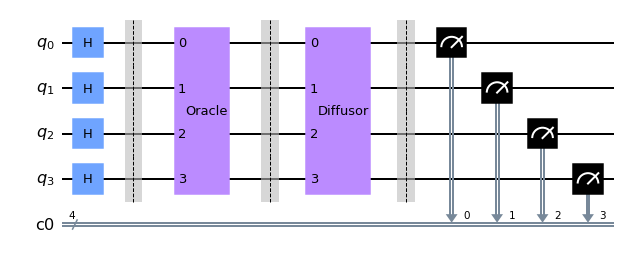

In [6]:
print('Depth: ', circuit.depth())
circuit.draw(output='mpl')

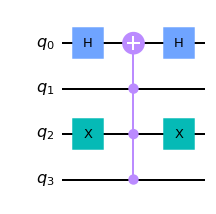

In [7]:
oracleCircuit(n, solutions).draw(output='mpl')

3851
{'1011': 3851, '0100': 301, '1111': 303, '1000': 258, '0110': 308, '0000': 278, '1100': 284, '1110': 278, '0111': 299, '1001': 288, '0001': 305, '1101': 310, '0010': 264, '0101': 292, '1010': 290, '0011': 283}


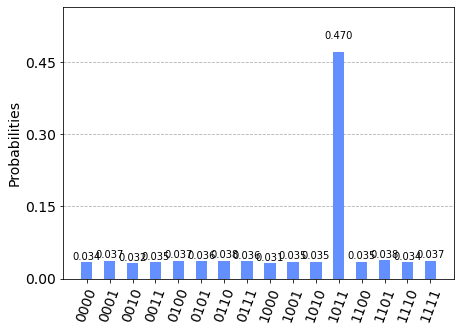

In [8]:
backend_sim = BasicAer.get_backend('qasm_simulator')
shots = 8192
job = execute(circuit, backend_sim, shots=shots)
result = job.result()
counts = result.get_counts(circuit)
print(counts.get(sols_key))
print(counts)

plot_histogram(counts)

## QMP: 4 circuits

In [9]:
m=4 # number of circuits
q_mp = QuantumRegister(m*n, 'q')
c_mp = ClassicalRegister(m*(n-2))

qc_mp = QuantumCircuit(q_mp, c_mp)  # 0 applications of Q, only a single A operator

for i in range(m):
    qc_mp.h(q_mp[n*i + 2])
    qc_mp.h(q_mp[n*i + 3])



qc_mp.x(4)
qc_mp.x(9)
qc_mp.x(12)
qc_mp.x(13)
    
    
for i in range(m):
    qc_mp.append(oracleCircuit(n, solutions), range(n*i,n*(i+1)))

for i in range(m):
    #qc_mp.append(diffCircuit(n, [0,1]), range(n*i,n*(i+1)))
    qc_mp.append(diffCircuit(2), range(n*i+2,n*(i+1)))

    
for i in range(m):    
    qc_mp.measure([2 + i*n, 3 + i*n],[0+i*(n-2), 1+i*(n-2)])


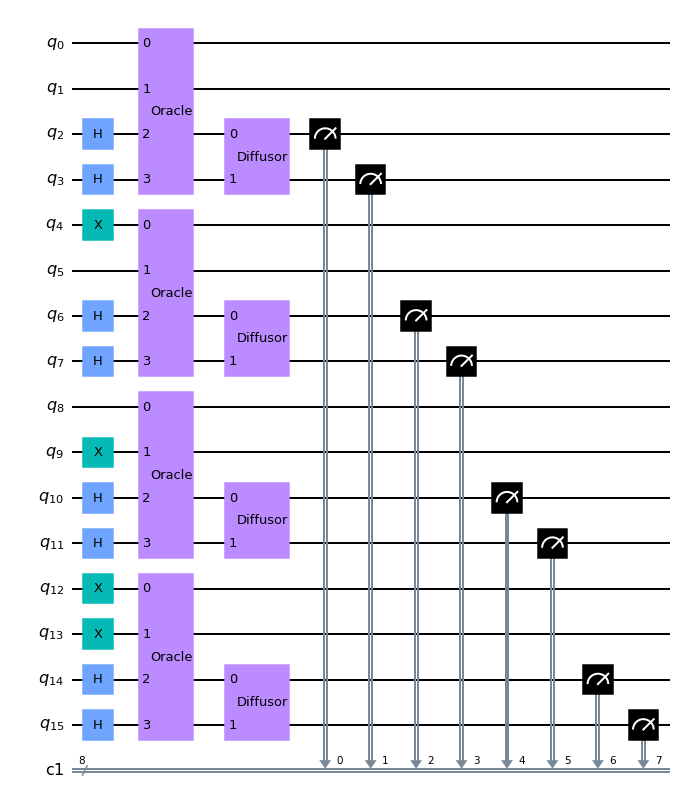

In [10]:
qc_mp.draw(output='mpl')

None
{'10101001': 133, '10010010': 139, '10100100': 119, '10110111': 140, '10001101': 137, '10010001': 141, '10010100': 98, '10110100': 121, '10111011': 131, '10111110': 138, '10010111': 132, '10001010': 135, '10111100': 147, '10010000': 127, '10011010': 128, '10011111': 137, '10001110': 141, '10100110': 114, '10001111': 105, '10110101': 132, '10000110': 142, '10000011': 135, '10011000': 114, '10011110': 125, '10110001': 122, '10101101': 140, '10111010': 128, '10110110': 143, '10101111': 109, '10111000': 136, '10101010': 139, '10010101': 130, '10111101': 114, '10101100': 133, '10000000': 136, '10110011': 142, '10000101': 130, '10001100': 135, '10100111': 108, '10000111': 116, '10010011': 102, '10011101': 124, '10001001': 130, '10111001': 146, '10100101': 138, '10100000': 126, '10010110': 131, '10011011': 131, '10100001': 140, '10101000': 107, '10001000': 134, '10000100': 109, '10101011': 131, '10111111': 118, '10100011': 110, '10011001': 139, '10110010': 141, '10100010': 121, '10011100

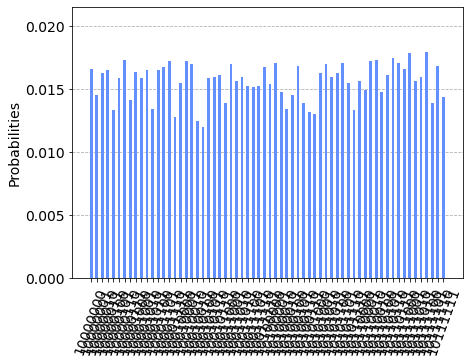

In [11]:
backend_sim = BasicAer.get_backend('qasm_simulator')

job = execute(qc_mp, backend_sim, shots=8192)
result = job.result()
counts = result.get_counts()
print(counts.get(sols_key))
print(counts)

plot_histogram(counts, bar_labels=False)

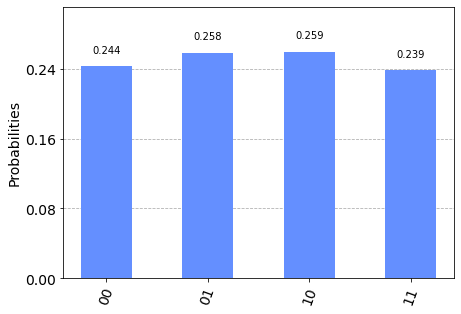

In [12]:
cnt0 = extractList(counts, (n-2)*m, 0, 2)
plot_histogram(cnt0)

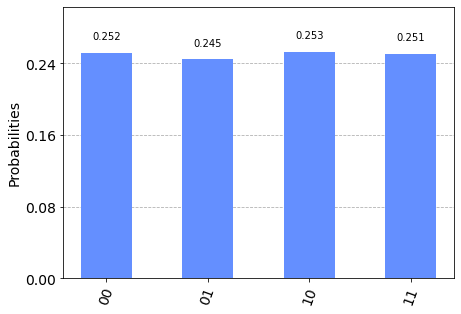

In [13]:
cnt1 = extractList(counts, (n-2)*m, 2, 2)
plot_histogram(cnt1)

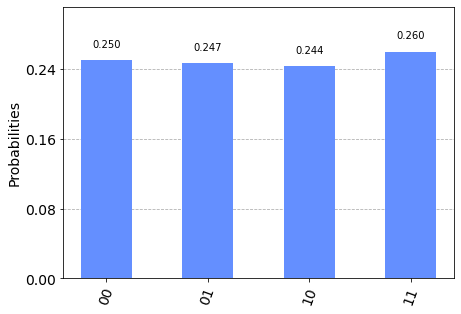

In [14]:
cnt2 = extractList(counts, (n-2)*m, 4, 2)
plot_histogram(cnt2)

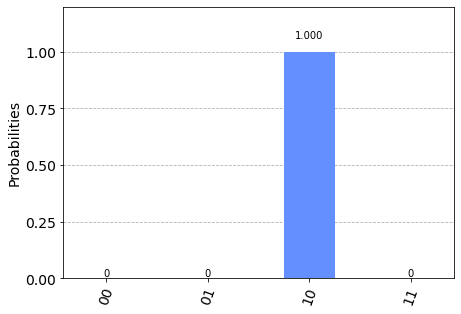

In [15]:
cnt3 = extractList(counts, (n-2)*m, 6, 2)
plot_histogram(cnt3)

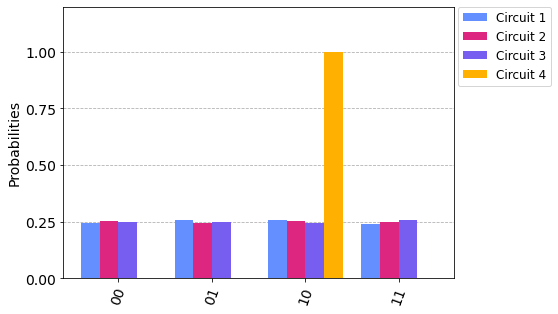

In [16]:
legend = ['Circuit 1', 'Circuit 2', 'Circuit 3', 'Circuit 4']
plot_histogram([cnt0, cnt1, cnt2, cnt3], legend=legend, bar_labels=False)

# Five qubits

In [17]:
n=5

# solutions : [Most Significant <-> Least Singnificant]
solutions = [[1,0,1,1,0], [1,0,0,0,1], [1,1,0,0,1]]

## Canonical Grover's Search with 1 Grover operator

In [18]:


q = QuantumRegister(n, 'q')
c = ClassicalRegister(n)

circuit = QuantumCircuit(q, c)  # 0 applications of Q, only a single A operator


addH(circuit, q)
circuit.barrier()

#oracle(circuit,q, n, solutions)
circuit.append(oracleMultiSolCircuit(n, solutions), range(n))

circuit.barrier()
#diff(qc,q, n)
circuit.append(diffCircuit(n), range(n))
circuit.barrier()


circuit.measure(q,c)

Depth:  4


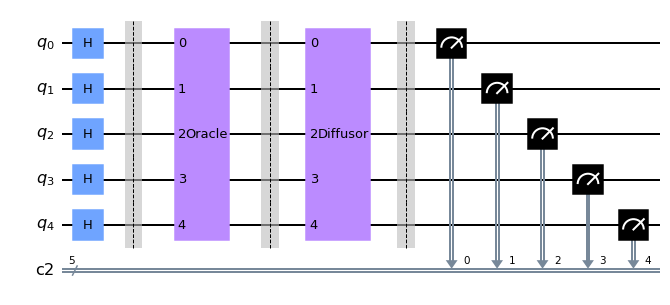

In [19]:
print('Depth: ', circuit.depth())
circuit.draw(output='mpl')

{'10001': 1790, '11001': 1757, '10010': 98, '00000': 116, '11000': 96, '10110': 1782, '10111': 97, '10101': 83, '01101': 105, '01110': 103, '01100': 95, '01011': 94, '01010': 99, '11110': 100, '00001': 84, '10100': 106, '01000': 100, '11111': 94, '00010': 92, '01001': 95, '00101': 100, '11100': 106, '11010': 75, '10000': 116, '00110': 105, '00011': 103, '00111': 100, '11101': 99, '00100': 73, '11011': 109, '10011': 112, '01111': 108}


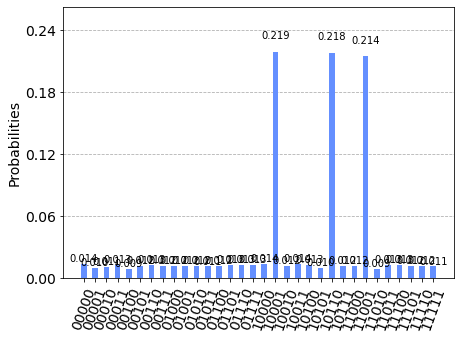

In [20]:
backend_sim = BasicAer.get_backend('qasm_simulator')

job = execute(circuit, backend_sim, shots=8192)
result = job.result()
counts = result.get_counts(circuit)
#print(counts.get(sols_key))
print(counts)

plot_histogram(counts)

## QMP: 4 circuits

In [21]:
m=4 # number of circuits
q_mp = QuantumRegister(m*n, 'q')
c_mp = ClassicalRegister(m*(n-2))

qc_mp = QuantumCircuit(q_mp, c_mp)  # 0 applications of Q, only a single A operator

for i in range(m):
    qc_mp.h(q_mp[n*i + 2])
    qc_mp.h(q_mp[n*i + 3])
    qc_mp.h(q_mp[n*i + 4])



qc_mp.x(5)
qc_mp.x(11)
qc_mp.x(15)
qc_mp.x(16)
    
    
for i in range(m):
    qc_mp.append(oracleMultiSolCircuit(n, solutions), range(n*i,n*(i+1)))

for i in range(m):
    qc_mp.append(diffCircuit(n, [0,1]), range(n*i,n*(i+1)))
    #qc_mp.append(diffCircuit(2), range(n*i+2,n*(i+1)))

    
for i in range(m):    
    qc_mp.measure([2 + i*n, 3 + i*n, 4 + i*n],[0+i*(n-2), 1+i*(n-2) ,2+i*(n-2)])



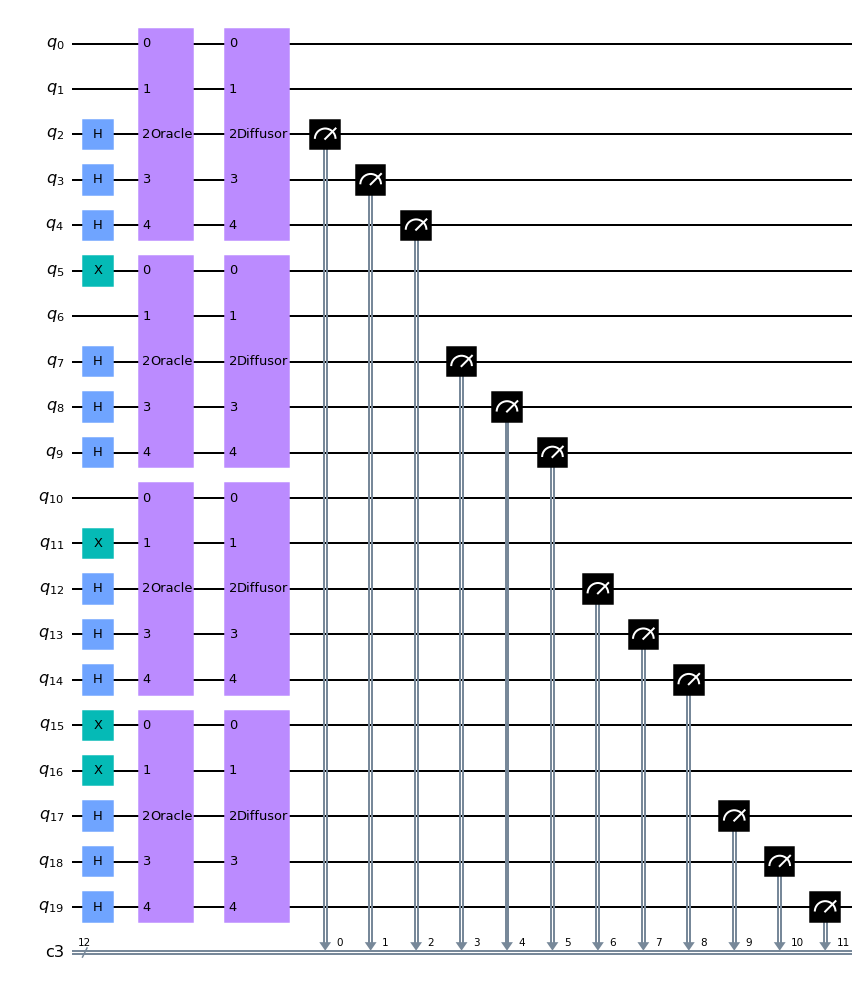

In [22]:
qc_mp.draw(output='mpl')

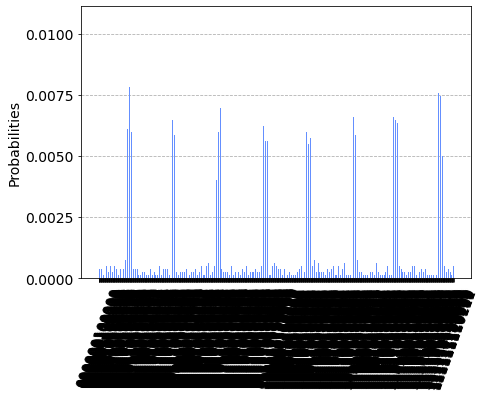

In [23]:
backend_sim = BasicAer.get_backend('qasm_simulator')

job = execute(qc_mp, backend_sim, shots=8192)
result = job.result()
counts = result.get_counts()
#print(counts.get(sols_key))
#print(counts)

plot_histogram(counts, bar_labels=False)

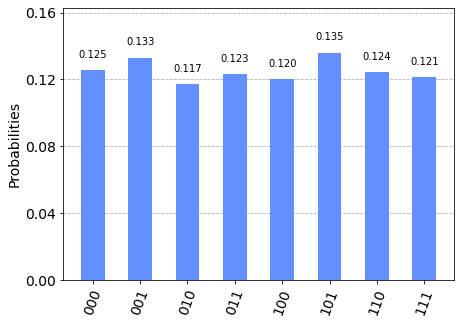

In [24]:
cnt0 = extractList(counts, (n-2)*m, 0, 3)
plot_histogram(cnt0)

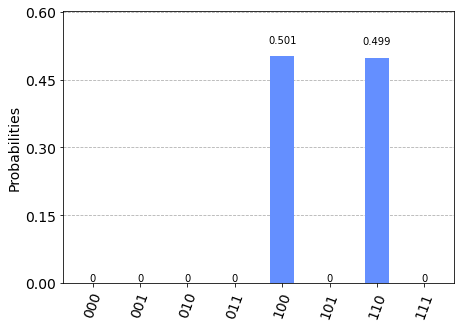

In [25]:
cnt1 = extractList(counts, (n-2)*m, 3, 3)
plot_histogram(cnt1)

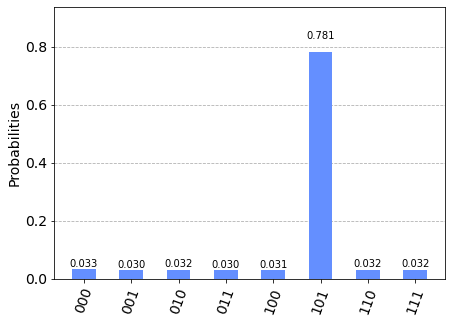

In [26]:
cnt2 = extractList(counts, (n-2)*m, 6, 3)
plot_histogram(cnt2)

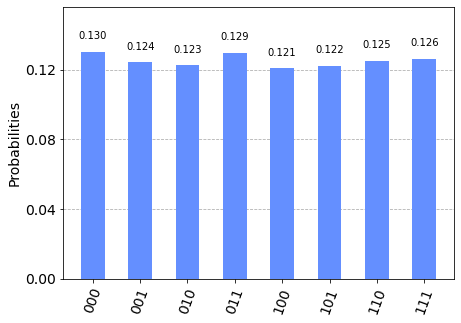

In [27]:
cnt3 = extractList(counts, (n-2)*m, 9, 3)
plot_histogram(cnt3)

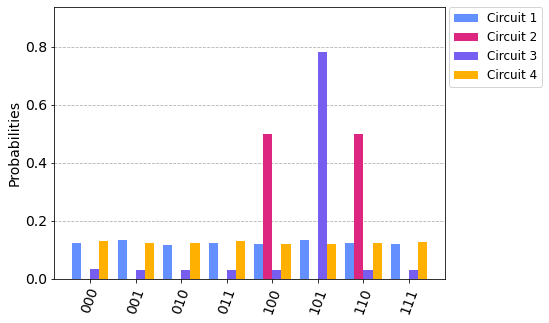

In [28]:
legend = ['Circuit 1', 'Circuit 2', 'Circuit 3', 'Circuit 4']
plot_histogram([cnt0, cnt1, cnt2, cnt3], legend=legend, bar_labels=False)